In [1]:
cd ..

/Users/jibanmac/Documents/GitHub/matter_emu_dgmgp


In [2]:
import os

from matter_multi_fidelity_emu.plottings.validation_loader import ValidationLoader
from matter_multi_fidelity_emu.data_loader import folder_name


from examples.make_plots_pipeline import PreloadedVloaders

In [3]:
import numpy as np
import h5py
import json
import glob
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

matplotlib.rcParams.update(
    {"font.size": 16, "axes.labelsize": 24, "axes.titlesize": 18, "text.usetex": True,
    "xtick.major.width": 1.5, "xtick.minor.width": 1.2, "ytick.major.width": 1.5, "ytick.minor.width": 1.2,
    "legend.fontsize": 18}
)

# colors to use
c_flatirons = '#8B2131'
c_sunshine = '#CA9500'
c_skyline = '#1D428A'
c_midnight = '#0E2240'

colors = [c_flatirons, c_sunshine, c_skyline, c_midnight]

# useful throughout
base_dir = '/Users/jibanmac/Documents/GitHub/matter_emu_dgmgp/data/'
emudir = '/Users/jibanmac/Documents/GitHub/matter_emu_dgmgp/data/dmo_60_res128box256/'
imgdir = '/Users/jibanmac/Documents/Latex/mf_boxsize_paper/images/'
zz = np.array([0, 0.2, 0.5, 1.0, 2.0, 3.0])
test = h5py.File(emudir+'cc_emulator_powerspecs.hdf5', 'r')
kf_test = test['kfmpc'][:]
test.close()

# SLHD versus Not using Slices

The comparison of using slices from SLHD or not using them, which will be just random shuffling the samples.

In [4]:
# pre-loading the validation data
vloaders = PreloadedVloaders()

 /Users/jibanmac/Documents/GitHub/matter_emu_dgmgp/matter_multi_fidelity_emu/plottings/validation_loader.py:149: RuntimeWarning:overflow encountered in power
 /Users/jibanmac/Documents/GitHub/matter_emu_dgmgp/matter_multi_fidelity_emu/plottings/validation_loader.py:133: RuntimeWarning:invalid value encountered in divide


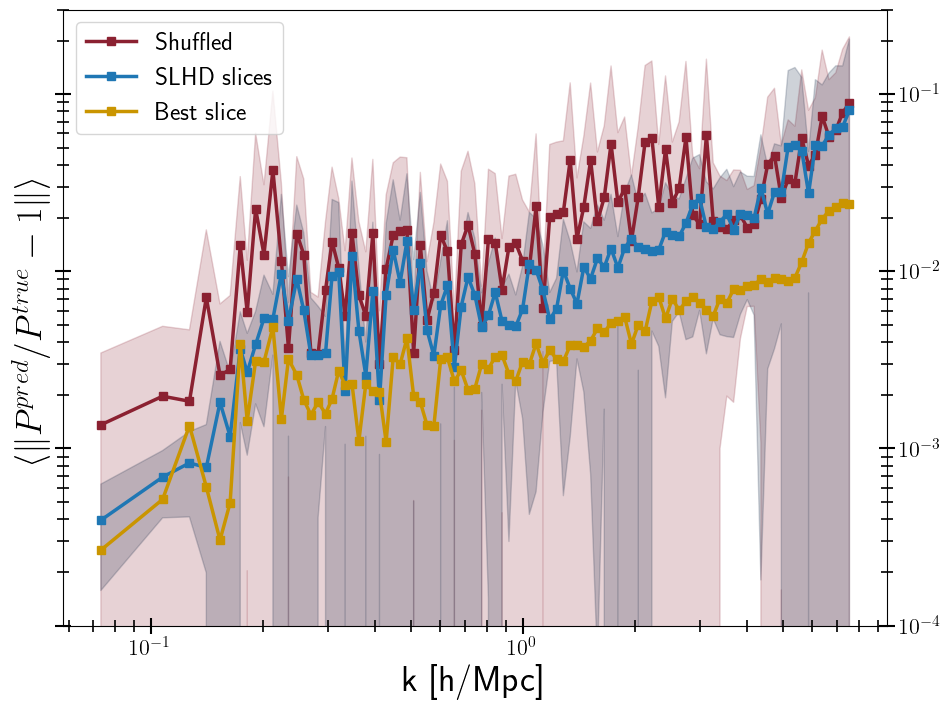

In [5]:
############################ SLHD versus not using slices ############################
# 5, 41, 57,
# xx 39, 15, 8,
# 7, 11, 4,
# 3, 59, 12,
# xx 16, 9, 14,
# 40, 0, 1,
# xx 10, 17, 6,
# 58, 2, 13

# These are shuffled samples
not_slhd_slices = [
    [5, 41, 57],
    [4, 7, 11],
    [3, 12, 59],
    [0, 1, 40],
    [2, 13, 58]
]

not_slhd_error = []

for slice_name in not_slhd_slices:
    vloader = getattr(vloaders, "dgmgp_L60_L2box100_H3_z0_1_2_slice_{}".format("_".join(map(str, slice_name))))

    not_slhd_error.append(
        vloader.relative_errors.mean(axis=(0, 1))
    )



## SLHD slices
slhd_slices = [
    [0, 1, 2],
    [3, 4, 5],
    [6, 7, 8],
    [9, 10 ,11],
    [12, 13, 14],
    [39, 40, 41],
    [57, 58, 59],
]

slhd_error = []

for slice_name in slhd_slices:
    vloader = getattr(vloaders, "dgmgp_L60_L2box100_H3_z0_1_2_slice_{}".format("_".join(map(str, slice_name))))

    slhd_error.append(
        vloader.relative_errors.mean(axis=(0, 1))
    )


fig, ax = plt.subplots(figsize=(10.625, 8), nrows=1, ncols=1, sharey=True)

# (z bins, test sims, k bins)
ax.loglog(
    10**vloader.kf[0],
    np.mean(not_slhd_error, axis=0),
    's-',
    lw=2.5,    
    label="Shuffled",
    color=c_flatirons
)
ax.fill_between(
    10**vloader.kf[0],
    np.mean(not_slhd_error, axis=0) - np.std(not_slhd_error, axis=0),
    np.mean(not_slhd_error, axis=0) + np.std(not_slhd_error, axis=0),
    color=c_flatirons,
    alpha=0.2,
)
ax.loglog(
    10**vloader.kf[0],
    np.mean(slhd_error, axis=0),
    's-',
    lw=2.5,    
    label="SLHD slices"
)
ax.fill_between(
    10**vloader.kf[0],
    np.mean(slhd_error, axis=0) - np.std(slhd_error, axis=0),
    np.mean(slhd_error, axis=0) + np.std(slhd_error, axis=0),
    color=c_midnight,
    alpha=0.2,
)



# Best
ax.loglog(
    10**vloaders.dgmgp_L60_H3_z0_1_2_slice_19.kf[0],
    vloaders.dgmgp_L60_H3_z0_1_2_slice_19.relative_errors.mean(axis=(0, 1)),
    's-',
    lw=2.5,    
    label="Best slice",
    color=c_sunshine,
    
)
ax.set_ylim(1e-4, 0.3)
ax.legend()

ax.set_xlabel(r'k [h/Mpc]', fontsize=26)
ax.set_ylabel(r'$\langle\| P^{{pred}}/P^{{true}} - 1 \|\rangle$', fontsize=26)


## Martin's settings
ax.tick_params(which='both', direction='inout', right=True, labelright=True, labelleft=False, length=12)
ax.tick_params(which='minor', length=8, labelright=False, labelleft=False)

fig.patch.set_facecolor('none')
fig.subplots_adjust(hspace=0, wspace=0)
fig.savefig(
    os.path.join(imgdir, "slhd_versus_not_slhd.pdf"),
    bbox_inches='tight', pad_inches=0.075
)
plt.show()

## Slices comparison

Slices in SLHD are Latin hypercubes in smaller sizes.
In principle, using any slice would not result in catastrophically bad emulation since none of the slices is clustered in the corner of the parameter space.

However, some slices might still be better in some situations than others.
We use a procedure similar to our grid search approach in \cite{Ho:2022} to avoid choosing the worst slice.


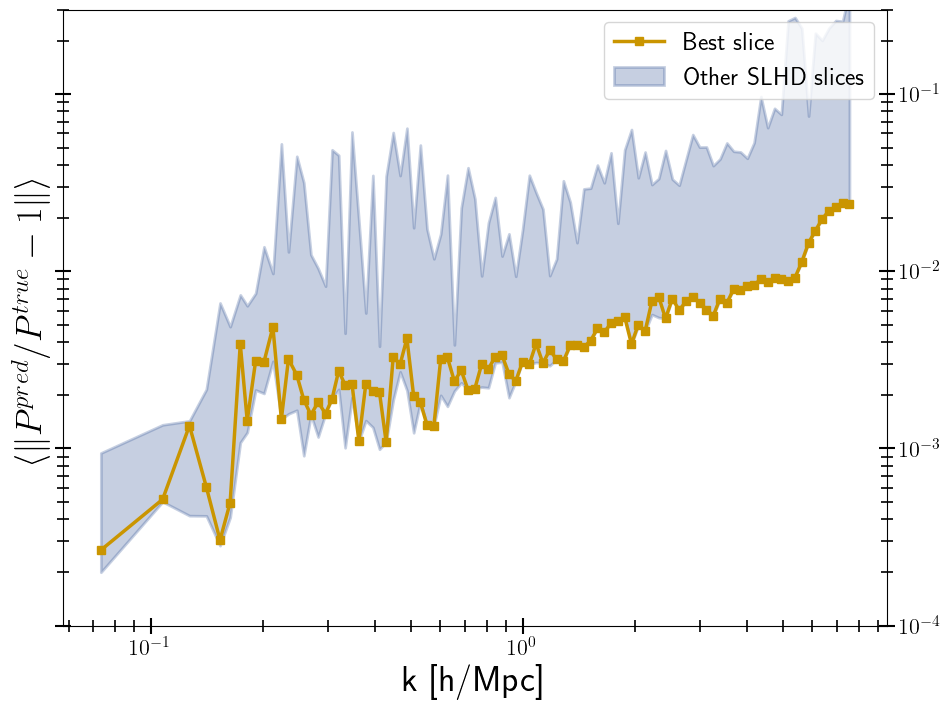

In [17]:

fig, ax = plt.subplots(figsize=(10.625, 8), nrows=1, ncols=1, sharey=True)


# Best: this is the one used in the paper
ax.loglog(
    10**vloaders.dgmgp_L60_H3_z0_1_2_slice_19.kf[0],
    vloaders.dgmgp_L60_H3_z0_1_2_slice_19.relative_errors.mean(axis=(0, 1)),
    's-',
    lw=2.5,    
    label="Best slice",
    color=c_sunshine,
    
)
# Other slices
# Martin suggested using shaded
ax.fill_between(
    10**vloader.kf[0],
    np.array(slhd_error).min(axis=0),
    np.array(slhd_error).max(axis=0),
    lw=2,
    label="Other SLHD slices",
    color=c_skyline,
    alpha=0.25,
)

ax.set_ylim(1e-4, 0.3)
ax.legend()

ax.set_xlabel(r'k [h/Mpc]', fontsize=26)
ax.set_ylabel(r'$\langle\| P^{{pred}}/P^{{true}} - 1 \|\rangle$', fontsize=26)


## Martin's settings
ax.tick_params(which='both', direction='inout', right=True, labelright=True, labelleft=False, length=12)
ax.tick_params(which='minor', length=8, labelright=False, labelleft=False)

fig.patch.set_facecolor('none')
fig.subplots_adjust(hspace=0, wspace=0)
fig.savefig(
    os.path.join(imgdir, "slhd_slices.pdf"),
    bbox_inches='tight', pad_inches=0.075
)
plt.show()